## Read the dataset from the CSV file

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("C:/Users/IliaMalfa/Desktop/MachineLearnignAssigment1/day.csv", index_col=None)
# The data are already normalized
# convert dates from 1/1/2011 to 112011
df.dteday = [s.replace('/', '') for s in df.dteday]
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,112011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,122011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,132011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,142011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,152011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12272012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12282012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12292012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12302012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Initialize Dataframes
#### I removed the instant column becuase is the index of the table, and the columns registered and casual because they sum up to cnt

In [2]:
decisionTreeDataframe = df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
                           'temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

linearRegressionDataframe =  df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

logisticRegressionDataframe =  df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

## a) Classification

In [3]:
X = decisionTreeDataframe.copy()
# remove the cnt from the data
del X["cnt"]

# I tested the outcome tree with 2,3,4,5 classes
# I decided that the optimal cut fot the cnt is in 3 parts because it gave me better results
y = pd.cut(decisionTreeDataframe.cnt, 3, labels=["A", "B", "C"], ordered=True)


feature_names = list(X.columns)
print(X)
print(y)

       dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0      112011       1   0     1        0        6           0           2   
1      122011       1   0     1        0        0           0           2   
2      132011       1   0     1        0        1           1           1   
3      142011       1   0     1        0        2           1           1   
4      152011       1   0     1        0        3           1           1   
..        ...     ...  ..   ...      ...      ...         ...         ...   
726  12272012       1   1    12        0        4           1           2   
727  12282012       1   1    12        0        5           1           2   
728  12292012       1   1    12        0        6           0           2   
729  12302012       1   1    12        0        0           0           1   
730  12312012       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  
0    0.344167  0.363625  0.8

In [4]:
from sklearn.model_selection import train_test_split

# Creation of train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Evaluation of decision tree performance based on train and test sets with different tree depths

>1, train: 0.523, test: 0.500
>2, train: 0.796, test: 0.791
>3, train: 0.879, test: 0.859
>4, train: 0.898, test: 0.859
>5, train: 0.922, test: 0.855
>6, train: 0.947, test: 0.850
>7, train: 0.955, test: 0.864
>8, train: 0.967, test: 0.845
>9, train: 0.980, test: 0.855
>10, train: 0.992, test: 0.841
>11, train: 0.996, test: 0.855
>12, train: 0.998, test: 0.855
>13, train: 0.998, test: 0.841
>14, train: 1.000, test: 0.845
>15, train: 1.000, test: 0.845
>16, train: 1.000, test: 0.836
>17, train: 1.000, test: 0.841
>18, train: 1.000, test: 0.836
>19, train: 1.000, test: 0.845
>20, train: 1.000, test: 0.836


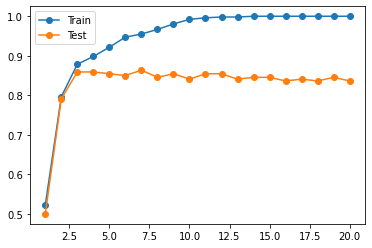

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 21)]

# evaluate a decision tree for each depth
for i in values:
       
    # As the selection measure I choose gini because it has better accuracy than entropy 
    # and the overfiting occurres in bigger depth of the tree
    
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
    
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [6]:
# Based on the diagram above I decided that the best depth for the tree is 3 ensuring that overfiting has not occurred
from sklearn import tree

dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)
print(feature_names)
text_representation = tree.export_text(dtree, feature_names=feature_names)
print(text_representation)

['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
|--- temp <= 0.44
|   |--- yr <= 0.50
|   |   |--- season <= 3.00
|   |   |   |--- class: A
|   |   |--- season >  3.00
|   |   |   |--- class: B
|   |--- yr >  0.50
|   |   |--- atemp <= 0.27
|   |   |   |--- class: A
|   |   |--- atemp >  0.27
|   |   |   |--- class: B
|--- temp >  0.44
|   |--- yr <= 0.50
|   |   |--- weathersit <= 2.50
|   |   |   |--- class: B
|   |   |--- weathersit >  2.50
|   |   |   |--- class: A
|   |--- yr >  0.50
|   |   |--- hum <= 0.81
|   |   |   |--- class: C
|   |   |--- hum >  0.81
|   |   |   |--- class: B



### The most prominent features are temp and yr

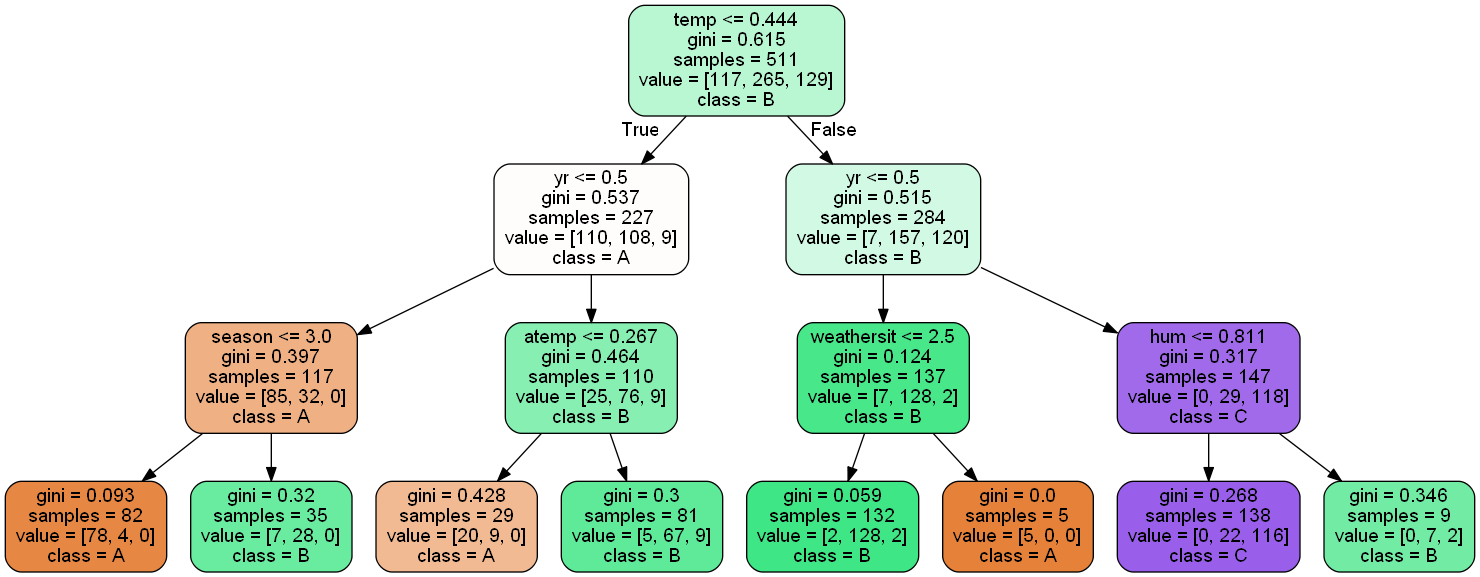

In [7]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



export_graphviz(dtree, 
                out_file='tree.dot', 
                feature_names=feature_names)

dot_data = export_graphviz(
    dtree, 
    out_file=None,
    feature_names=feature_names,
    class_names = ['A', 'B', 'C'],
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


## b) Linear Regression

In [8]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sys
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

X = linearRegressionDataframe.copy()
y = X['cnt']

# remove the cnt from the data
del X["cnt"]


print(X.head())
print(y.head())

       temp     atemp       hum  windspeed
0  0.344167  0.363625  0.805833   0.160446
1  0.363478  0.353739  0.696087   0.248539
2  0.196364  0.189405  0.437273   0.248309
3  0.200000  0.212122  0.590435   0.160296
4  0.226957  0.229270  0.436957   0.186900
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


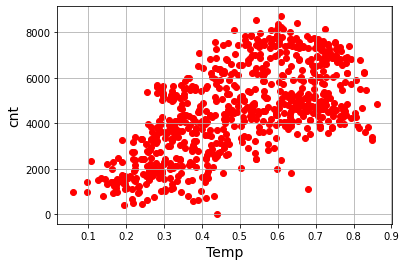

In [9]:
from sklearn.model_selection import train_test_split

# create the train and the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# view how the data of the temp feature are distributed    
plt.scatter(X['temp'], y, color='red')
plt.xlabel('Temp', fontsize=14)
plt.ylabel('cnt', fontsize=14)
plt.grid(True)
plt.show()

### Learning Rate 0.1

In [10]:
# Using stdout to print the loss for each epoch
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 5277.64, NNZs: 4, Bias: 2273.689770, T: 511, Avg. loss: 1307814.713729
Total training time: 0.00 seconds.
[3812.55674016 3473.67530287 -596.35297837 -946.46122995]
[6380.41734834 2861.46077316 6856.15521807 6789.51312816 5997.58439456
 5129.42810103 3678.93167225 6239.08473046 7506.30313348 4062.56423782
 4213.5370116  6676.34499372 4193.79251891 4573.11240246 4424.57823221
 4074.14646729 3600.93099965 5994.59250019 4407.11233507 4067.58836472
 3869.43262979 3620.03187005 4588.8780974  7414.00140904 4981.70252279
 3503.69687806 3864.23923753 6421.71385786 5914.08710602 3291.28845943
 3681.72351661 4488.72365877 3912.03635591 5161.04906678 3995.04277024
 5539.61271387 4897.13822746 3836.04013935 6580.48378458 4442.90092398
 3747.97962761 3847.02510067 3671.79059794 4708.62002833 6949.5013746
 4390.8605817  5713.41586951 7074.62777066 4699.73885377 7001.95993832
 4998.96092392 4871.39551001 6563.7542014  6709.63814064 5259.70885066
 6585.57756388 6815.1977573  7001.84465

In [11]:
# Prepare the train and test data

n = len(X) ;# I will use all the instances
fX_train = X_train[:n].values
fy_train = y_train[:n].values
fX_test = X_test[:n].values
fy_test = y_test[:n].values

In [12]:
# I am using the stochastic gradient descent with suitable options, to get linear regression because it does the calculations
# faster than gradient descent and performing one pass of SGD on a particular dataset is statistically (minimax) optimal.
# In other words, no other algorithm can get one better results on the expected loss 

learning_rate = 0.1


sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

In [13]:
p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
coef_list=[]; # this holds the coefficient values
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX_train, fy_train)
    y = model.predict(fX_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(fy_train-y))
    print(y, fy_train, np.sum(fy_train-y))

### Loss function over epochs

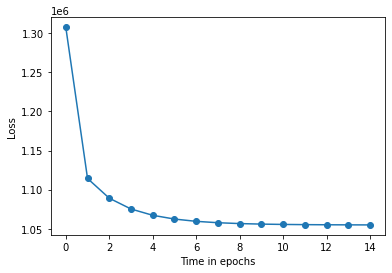

In [14]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
    
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()    


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(fX_test)

print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(fy_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 4041.43712568  3531.57323402 -2522.06888536 -5036.10807806]
Mean squared error: 3149913.41
Variance score: 0.24


### Learning Rate 0.01

In [16]:
# Using stdout to print the loss for each epoch
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 2646.84, NNZs: 4, Bias: 2165.147889, T: 511, Avg. loss: 1928585.579363
Total training time: 0.00 seconds.
[1752.44882044 1632.03558015 1096.66209391  261.68786739]
[4837.55432899 3295.20490944 5300.6341545  5285.07123505 4769.77350714
 4391.1419433  3619.48803711 5050.96564995 5480.5978049  3965.00381159
 3864.35514754 5272.02057084 3853.37444483 4020.39906594 4079.95720099
 3664.35096889 3601.18142934 5087.73459321 3967.38018994 3979.15359007
 4189.51515417 3877.54105626 3996.38307766 5441.07330834 4186.78421911
 3533.20384552 3866.74571251 5205.69379183 4602.059937   3441.42986162
 3691.93575165 4108.20362628 3565.6676292  4323.83529784 3984.55345944
 4756.14728946 4464.50070744 3789.10703074 4978.83001239 3957.92786714
 3973.77465552 3856.81570487 4070.94552811 4381.6698425  5512.14536978
 3983.15539597 4973.80873159 5498.45769455 4292.48445021 5283.49674725
 4098.91932458 4445.55476933 4980.05015837 5194.8574957  4863.80952454
 5006.76544621 5407.68508871 5332.7657

In [17]:
# I am using the stochastic gradient descent with suitable options, to get linear regression because it does the calculations
# faster than gradient descent and performing one pass of SGD on a particular dataset is statistically (minimax) optimal.
# In other words, no other algorithm can get one better results on the expected loss 

learning_rate = 0.01


sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

In [18]:
p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
coef_list=[]; # this holds the coefficient values
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX_train, fy_train)
    y = model.predict(fX_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(fy_train-y))
    print(y, fy_train, np.sum(fy_train-y))

### Loss function over epochs

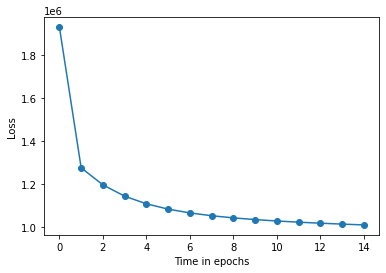

In [19]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
    
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()    

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(fX_test)

print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(fy_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [ 3676.5954899   3380.1569444  -1352.0049982  -1364.28023763]
Mean squared error: 2395147.15
Variance score: 0.42


### Learning Rate 0.001

In [21]:
# Using stdout to print the loss for each epoch
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 1457.16, NNZs: 4, Bias: 1456.744030, T: 511, Avg. loss: 6033444.446352
Total training time: 0.00 seconds.
[815.57450889 773.80118634 889.72331492 260.3553678 ]
[2910.79298142 2204.97520623 3195.4159426  3192.45283811 2906.1410901
 2738.40110055 2351.24552061 3090.009251   3246.89731229 2559.06162659
 2464.85975671 3192.73223086 2455.57598798 2532.90045793 2600.21561479
 2335.13385903 2334.30949974 3146.95946077 2512.39369285 2566.64136188
 2745.93770522 2550.24306765 2508.76544075 3229.9271735  2604.67414304
 2306.38631835 2510.21288567 3178.36624499 2797.9408377  2266.25240716
 2405.41735844 2604.00860031 2276.70753408 2682.28105299 2579.2724221
 2954.01274873 2819.15177387 2453.62960413 2989.25950782 2504.91241898
 2598.68206502 2502.2111656  2687.39947233 2790.41920954 3338.14793164
 2535.33259186 3098.27840587 3318.10245641 2716.81615309 3162.65215209
 2535.2140389  2818.01027948 2989.84797181 3134.63645928 3072.13575885
 3004.9550118  3275.58832833 3201.36788607 2

In [22]:
# I am using the stochastic gradient descent with suitable options, to get linear regression because it does the calculations
# faster than gradient descent and performing one pass of SGD on a particular dataset is statistically (minimax) optimal.
# In other words, no other algorithm can get one better results on the expected loss 

learning_rate = 0.001


sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

In [23]:
p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
coef_list=[]; # this holds the coefficient values
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX_train, fy_train)
    y = model.predict(fX_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(fy_train-y))
    print(y, fy_train, np.sum(fy_train-y))

### Loss function over epochs

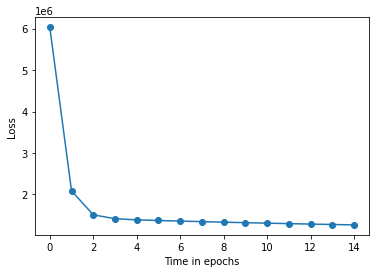

In [24]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
    
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()  

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(fX_test)

print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(fy_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [1970.68528103 1825.42675359  918.8676771   153.91122217]
Mean squared error: 3056597.41
Variance score: 0.26


### The most suitable a has been 0.01 because ti has the less mean squared error and also the biggest variance score.

## The prominent feature that I choose is Temp

In [26]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sys
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

linearRegressionDataframe =  df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()
X = linearRegressionDataframe[['temp']]
y = linearRegressionDataframe['cnt']
print(X.head())
print(y.head())

       temp
0  0.344167
1  0.363478
2  0.196364
3  0.200000
4  0.226957
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


In [27]:
# Using stdout to print the loss for each epoch
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 502.20, NNZs: 1, Bias: 773.600000, T: 1, Avg. loss: 29922848.000000
Total training time: 0.00 seconds.
[502.1955912]
[1099.60880535] [7736] 6636.391194647469
-- Epoch 1
Norm: 933.01, NNZs: 1, Bias: 1437.239119, T: 1, Avg. loss: 22020844.044197
Total training time: 0.00 seconds.
[933.00820747]
[2042.91725848] [7736] 5693.082741519451
-- Epoch 1
Norm: 1302.58, NNZs: 1, Bias: 2006.547394, T: 1, Avg. loss: 16205595.550893
Total training time: 0.00 seconds.
[1302.58435187]
[2852.14216957] [7736] 4883.857830431638
-- Epoch 1
Norm: 1619.63, NNZs: 1, Bias: 2494.933177, T: 1, Avg. loss: 11926033.653934
Total training time: 0.00 seconds.
[1619.62828549]
[3546.34241187] [7736] 4189.657588131672
-- Epoch 1
Norm: 1891.61, NNZs: 1, Bias: 2913.898935, T: 1, Avg. loss: 8776615.352895
Total training time: 0.00 seconds.
[1891.60703024]
[4141.86779648] [7736] 3594.1322035244293
-- Epoch 1
Norm: 2124.93, NNZs: 1, Bias: 3273.312156, T: 1, Avg. loss: 6458893.148206
Total training time: 0.00

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

n = 1 ;# number of instances to keep

fX_train = X_train[:n].values
fy_train = y_train[:n].values
fX_test = X_test[:n].values
fy_test = y_test[:n].values

fX = X[:n]
fy = y[:n]

In [29]:
# I am using 0.1 because is the better option
learning_rate = 0.1


sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

In [30]:
p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
coef_list=[]; # this holds the coefficient values
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX_train, fy_train)
    y = model.predict(fX_train)
    coef_list.append(model.coef_.tolist())
    print(model.coef_)
    p_sum.append(np.sum(fy_train-y))
    print(y, fy_train, np.sum(fy_train-y))


In [31]:


sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))



### Loss function over epochs

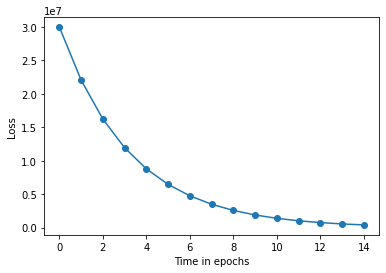

In [32]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

### Loss with respect to $y-\hat{y}$

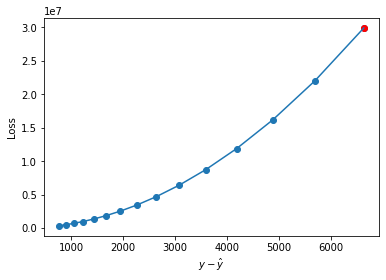

In [33]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

## c) Logistic Regression

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

X = logisticRegressionDataframe.copy()
del X["cnt"]

# cut the cnt into 2 pieces for Logistic Regression
labels=["Few", "Many"]
y = pd.cut(logisticRegressionDataframe.cnt, 2, labels=labels, ordered=True)

In [56]:
from sklearn.model_selection import train_test_split

# create the train and the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

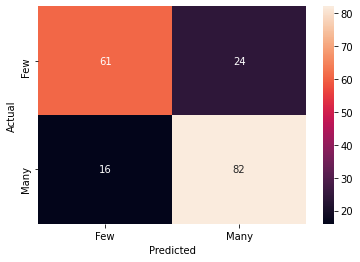

In [57]:
# Create a logistic regression model to Test to predict the cnt from 
logistic_regression= LogisticRegression().fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

# Use a heatmap to compare the predicted with the actual "Few" and "Many" instances
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [59]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7814207650273224


### Loss ploted with single instance

In [38]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [39]:
n = 1;# number of instances to keep

fX_train = X_train[:n].values
fy_train = y_train[:n].values
fX_test = X_test[:n].values
fy_test = y_test[:n].values

In [40]:
learning_rate = 2


sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

In [41]:
p_sum  = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
p2_sum = []
coef_list=[]
coef2_list=[]
epochs = 15 ;# number of epochs


for epoch in range(epochs):
    model  = sgd.partial_fit(fX_train, fy_train, classes=labels)
    model2 = sgd2.partial_fit(fX_train, fy_train, classes=labels)
    print(model.coef_)
    y  = model.predict(fX_train)
    p  = model.decision_function(fX_train)
    c  = (1 - np.mean(y == fy_train))
    coef_list.append(model.coef_.tolist())
    p_sum.append(p)
    y2 = model2.predict(fX_train)
    p2 = model2.decision_function(fX_train)
    c2 = (1 - np.mean(y2 == fy_train))
    coef2_list.append(model2.coef_.tolist())
    p2_sum.append(p2)

In [42]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()

#print(loss_history)
loss_list  = []
loss2_list = []
use_first = True
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if use_first:
        loss_list.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list.append(float(line.split("loss: ")[-1]))
    use_first = not use_first

### Loss function over epochs


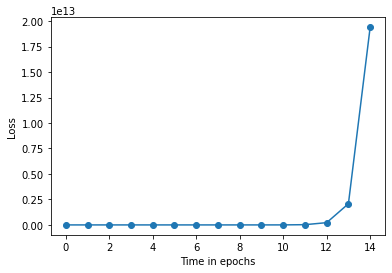

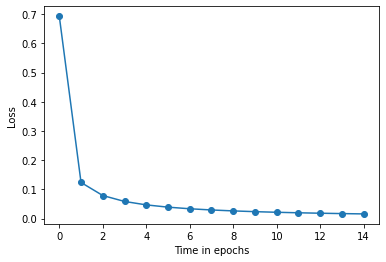

In [43]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(np.arange(len(loss2_list)), loss2_list)
plt.scatter(np.arange(len(loss2_list)), loss2_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()



### Loss with respect to $y-\hat{y}$

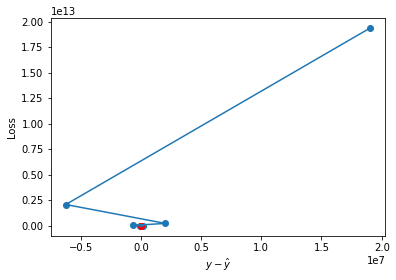

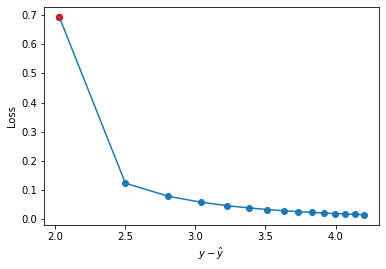

In [44]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(p2_sum, loss2_list)
plt.scatter(p2_sum, loss2_list)
plt.scatter(p2_sum[:1], loss2_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

### Loss ploted with all the instances of the data set

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

X = logisticRegressionDataframe.copy()
del X["cnt"]

# cut the cnt into 2 pieces for Logistic Regression
labels=["Few", "Many"]
y = pd.cut(logisticRegressionDataframe.cnt, 2, labels=labels, ordered=True)

In [46]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

n = len(X);# number of instances to keep

fX_train = X_train[:n].values
fy_train = y_train[:n].values
fX_test = X_test[:n].values
fy_test = y_test[:n].values

In [48]:
learning_rate = 2


sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

In [49]:
p_sum  = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
p2_sum = []
coef_list=[]
coef2_list=[]
epochs = 15 ;# number of epochs


for epoch in range(epochs):
    model  = sgd.partial_fit(fX_train, fy_train, classes=labels)
    model2 = sgd2.partial_fit(fX_train, fy_train, classes=labels)
    print(model.coef_)
    y  = model.predict(fX_train)
    p  = model.decision_function(fX_train)
    c  = (1 - np.mean(y == fy_train))
    coef_list.append(model.coef_.tolist())
    p_sum.append(p)
    y2 = model2.predict(fX_train)
    p2 = model2.decision_function(fX_train)
    c2 = (1 - np.mean(y2 == fy_train))
    coef2_list.append(model2.coef_.tolist())
    p2_sum.append(p2)

In [50]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()

#print(loss_history)
loss_list  = []
loss2_list = []
use_first = True
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if use_first:
        loss_list.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list.append(float(line.split("loss: ")[-1]))
    use_first = not use_first

### Loss function over epochs


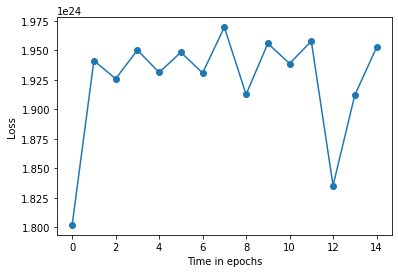

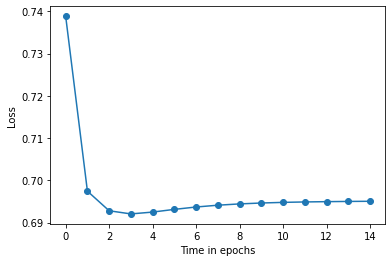

In [51]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(np.arange(len(loss2_list)), loss2_list)
plt.scatter(np.arange(len(loss2_list)), loss2_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

### Loss with respect to $y-\hat{y}$


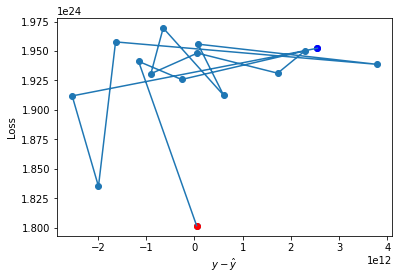

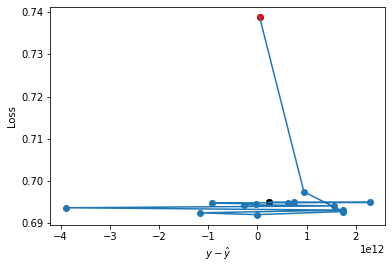

In [60]:
# reshape coef lists
coef_list=np.reshape(coef_list, (-1,15)).T
coef2_list=np.reshape(coef2_list, (-1,15)).T
coef_list =coef_list[:,0]
coef2_list =coef2_list[:,0]


plt.figure()
plt.plot(coef_list, loss_list)
plt.scatter(coef_list, loss_list)
plt.scatter(coef_list[:1], loss_list[:1], color='red')
plt.scatter(coef_list[-1], loss_list[-1], color='blue')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(coef2_list, loss2_list)
plt.scatter(coef2_list, loss2_list)
plt.scatter(coef2_list[:1], loss2_list[:1], color='red')
plt.scatter(coef2_list[-1], loss2_list[-1], color='black')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()